In [67]:
import pandas as pd
path = 'E:\MobiiliOhjelmointi\Harjoitukset\LocationGps\LocationGps.csv'

df = pd.read_csv(path)
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Jere\AppData\Local\Temp\ipykernel_12156\168491377.py:2: SyntaxWarning: invalid escape sequence '\M'
  path = 'E:\MobiiliOhjelmointi\Harjoitukset\LocationGps\LocationGps.csv'


,Time (s),Latitude (°),Longitude (°),Altitude (m),Altitude WGS84 (m),Speed (m/s),Direction (°),Distance (km),Horizontal Accuracy (m),Vertical Accuracy (m),Satellites
0,0.014944,64.268166,24.798431,67.956137,86.000000,NaN,NaN,0.021483,51.952999,5.851500,0.0
1,2.550931,64.268340,24.798236,96.350336,114.393982,0.90,253.699997,0.024041,9.818622,12.699322,14.0
2,3.566157,64.268363,24.798239,90.577595,108.621216,0.98,322.899994,0.028926,5.560087,8.447682,26.0
3,3.754420,64.268320,24.798221,85.250889,103.294556,1.02,318.200012,0.029967,3.790092,2.690343,26.0
4,4.755023,64.268311,24.798214,82.258875,100.302551,1.13,318.500000,0.030361,3.790092,2.500000,32.0


In [68]:
import folium

df_orig = df.copy()
df = df[df['Satellites']>14].reset_index(drop=True)

lat_mean = df['Latitude (°)'].mean()
long_mean = df['Longitude (°)'].mean()

my_map = folium.Map(location = [lat_mean,long_mean], zoom_start = 17)
folium.Marker([lat_mean,long_mean]).add_to(my_map)

folium.PolyLine(df[['Latitude (°)','Longitude (°)']], color = 'blue', opacity = 1).add_to(my_map)

my_map.save('Kartta.html')
my_map

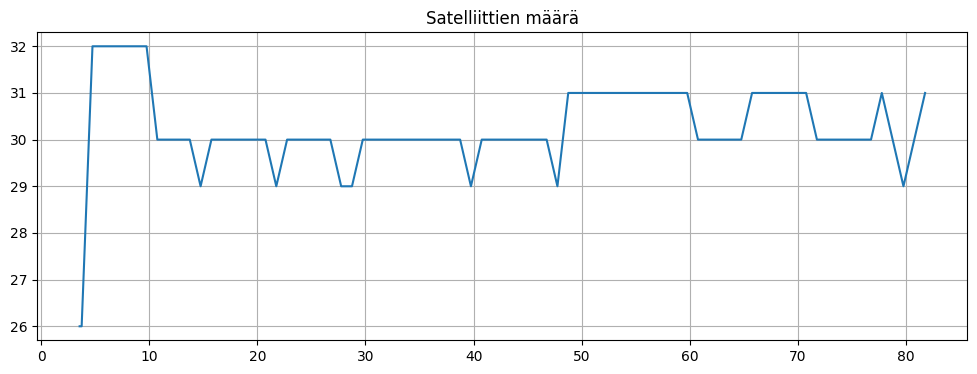

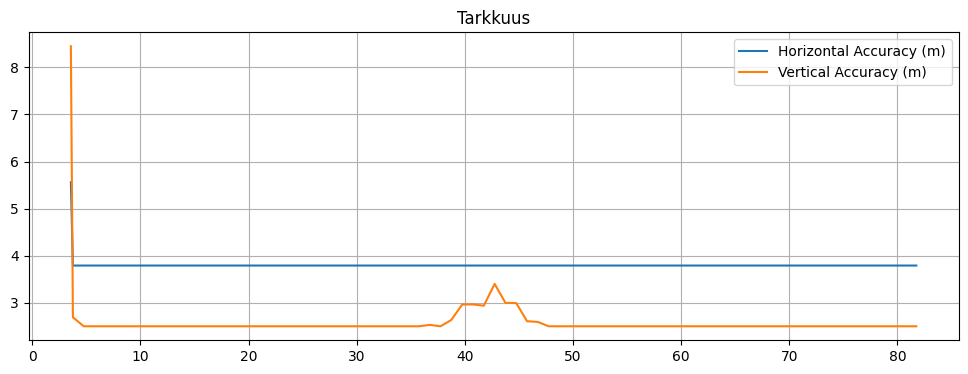

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(df['Time (s)'],df['Satellites'])
plt.grid()
plt.title('Satelliittien määrä')
plt.show()

plt.figure(figsize=(12,4))
plt.plot(df['Time (s)'],df['Horizontal Accuracy (m)'])
plt.plot(df['Time (s)'],df['Vertical Accuracy (m)'])
plt.legend(['Horizontal Accuracy (m)','Vertical Accuracy (m)'])
plt.grid()
plt.title('Tarkkuus')
plt.show()

In [70]:
import numpy as np
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371
    return c * r

In [71]:
lat = df['Latitude (°)']
lon = df['Longitude (°)']

df['dist'] = np.zeros(len(df))

for i in range(0,(len(df)-1)):
    df.loc[i,'dist'] = df['dist'][i] = haversine(lon[i],lat[i],lon[i+1], lat[i+1])*1000
df['tot_dist'] = np.cumsum(df['dist'])

C:\Users\Jere\AppData\Local\Temp\ipykernel_12156\3322159253.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.loc[i,'dist'] = df['dist'][i] = haversine(lon[i],lat[i],lon[i+1], lat[i+1])*1000
C:\Users\Jere\AppData\Local\Temp\ipykernel_12

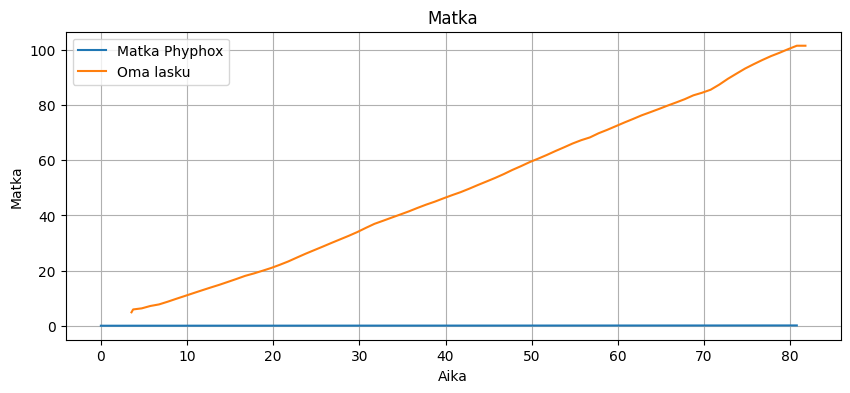

,Time (s),Latitude (°),Longitude (°),Altitude (m),Altitude WGS84 (m),Speed (m/s),Direction (°),Distance (km),Horizontal Accuracy (m),Vertical Accuracy (m),Satellites,dist,tot_dist
0,3.566157,64.268363,24.798239,90.577595,108.621216,0.98,322.899994,0.028926,5.560087,8.447682,26.0,4.884906,4.884906
1,3.754420,64.268320,24.798221,85.250889,103.294556,1.02,318.200012,0.029967,3.790092,2.690343,26.0,1.041009,5.925914
2,4.755023,64.268311,24.798214,82.258875,100.302551,1.13,318.500000,0.030361,3.790092,2.500000,32.0,0.394200,6.320115
3,5.754679,64.268310,24.798206,79.806177,97.849854,1.10,318.399994,0.031223,3.790092,2.500000,32.0,0.861771,7.181886
4,6.755091,64.268315,24.798192,79.253939,97.297607,1.25,315.399994,0.031787,3.790092,2.500000,32.0,0.564610,7.746496
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,77.754600,64.268255,24.798377,70.235478,88.279236,1.23,267.399994,0.121845,3.790092,2.500000,31.0,1.410399,97.804291
76,78.754865,64.268252,24.798348,70.540837,88.584595,1.19,247.300003,0.123066,3.790092,2.500000,30.0,1.220428,99.024719
77,79.755052,64.268244,24.798332,70.556882,88.600647,1.14,206.399994,0.124380,3.790092,2.500000,29.0,1.314498,100.339217
78,80.754787,64.268232,24.798325,70.682054,88.725830,1.24,183.399994,0.125620,3.790092,2.500000,30.0,1.239541,101.578758


In [72]:
plt.figure(figsize=(10,4))
plt.plot(df_orig['Time (s)'],df_orig['Distance (km)'])
plt.plot(df['Time (s)'],df['tot_dist'])
plt.legend(['Matka Phyphox','Oma lasku'])
plt.grid()
plt.title('Matka')
plt.ylabel('Matka')
plt.xlabel('Aika')
plt.show()
display(df)